In [1]:
import sklearn, keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


### Load in Some Text to Cluster


In [2]:
posts_raw = pd.read_csv('political_social_media.csv',dtype='str',engine='python')

In [3]:
posts_raw.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,FALSE,finalized,1,8/4/15 21:17,national,1,partisan,1,policy,...,nan,nan,nan,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),nan,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,FALSE,finalized,1,8/4/15 21:20,national,1,partisan,1,attack,...,nan,nan,nan,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),nan,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,FALSE,finalized,1,8/4/15 21:14,national,1,neutral,1,support,...,nan,nan,nan,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),nan,twitter,Please join me today in remembering our fallen...
3,766192487,FALSE,finalized,1,8/4/15 21:08,national,1,neutral,1,policy,...,nan,nan,nan,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),nan,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,FALSE,finalized,1,8/4/15 21:26,national,1,partisan,1,policy,...,nan,nan,nan,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),nan,twitter,.@amazon delivery #drones show need to update ...


In [4]:
text_raw = pd.DataFrame(posts_raw['text'])

In [5]:
print(type(text_raw), text_raw.head(20))

print(text_raw.iloc[0]['text'])

<class 'pandas.core.frame.DataFrame'>                                                  text
0   RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1   VIDEO - #Obamacare:  Full of Higher Costs and ...
2   Please join me today in remembering our fallen...
3   RT @SenatorLeahy: 1st step toward Senate debat...
4   .@amazon delivery #drones show need to update ...
5   Called on the @USDOTFRA to release info about ...
6   @BBCWorld, help us keep the kidnapped Nigerian...
7   Show your Arizona pride-choose your favorite S...
8   What a wonderful night at State Senator Ken Ya...
9   Great op-ed by Pres. Clinton about signing #FM...
10  As POTUS golfs, pushes amnesty &amp; ignores K...
11  The President doesn�۪t get to just decide he d...
12  FACT: The Recovery Act cut taxes for middle-cl...
13  RT @MHA: Telemedicine consults at rural ERs he...
14  @SkitchP Wouldn't wish that on anyone. Even yo...
15  At 5:45pm, Sen. @CoryBooker will give his maid...
16  "...if you have come because your libera

### Dirty Text? Clean It Up!

In [6]:
text_alpha = pd.DataFrame()
for row_num in range(len(text_raw)):
    row = text_raw.iloc[row_num]
#     print(row, row['text'])
    clean_row = list(filter(lambda ch: str.isalpha(ch) or ch==' ', row['text']))
#     print(type(clean_row[0]))
    clean_row = ''.join(clean_row)
#     print(clean_row)
    clean_row = pd.Series(clean_row)
    text_alpha = text_alpha.append(clean_row, ignore_index = True)

In [95]:
print(text_alpha.head(100), len(text_alpha))

                                                    0
0   RT nowthisnews Rep Trey Radel R FL slams Obama...
1   VIDEO  Obamacare  Full of Higher Costs and Bro...
2   Please join me today in remembering our fallen...
3   RT SenatorLeahy st step toward Senate debate o...
4   amazon delivery drones show need to update law...
5   Called on the USDOTFRA to release info about i...
6   BBCWorld help us keep the kidnapped Nigerian s...
7   Show your Arizona pridechoose your favorite S ...
8   What a wonderful night at State Senator Ken Ya...
9   Great oped by Pres Clinton about signing FMLA ...
10  As POTUS golfs pushes amnesty amp ignores Keys...
11  The President doesnt get to just decide he doe...
12  FACT The Recovery Act cut taxes for middleclas...
13  RT MHA Telemedicine consults at rural ERs help...
14  SkitchP Wouldnt wish that on anyone Even you S...
15  At pm Sen CoryBooker will give his maiden Sena...
16  if you have come because your liberation is bo...
17  For health coverage star

In [96]:
import requests, json, time
# scores = pd.DataFrame()
endpoint = 'http://0.0.0.0:5000/ml_models/simple_score'
scores_dict = {}
t1 = time.clock()
for row_num in range(len(text_alpha)):
    text = text_alpha.iloc[row_num][0]
#     print(row_num, text, type(text))
    if "anxiety" in text:
        text = text.replace("anxiety","")
    data = {"sample":text}
#     print(type(data))
    response = requests.post(endpoint, json=data)
    values = {}
    if response:
        values = json.loads(response.content)
    if row_num % 500 == 0:
        print(row_num)
#     print(values, type(values))
#     new_row = pd.DataFrame.from_dict(values, 'columns')
#     print(new_row)
#     scores = scores.append(new_row)
    scores_dict[row_num] = values
t2 = time.clock()
print('completed in:',t2-t1)
scores = pd.DataFrame.from_dict(scores_dict, 'index')

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [97]:
scores = scores.replace(np.nan,0)

In [99]:
print(scores.head(), len(scores))


   freedom 3   grace 3  hostility 3  lifelessness 3   power 3  unification 3  \
0    0.15949  0.043687     0.104058        0.213675  0.027878       0.101523   
2    0.00000  0.043687     0.104058        0.000000  0.027878       0.101523   
3    0.00000  0.000000     0.000000        0.000000  0.055757       0.000000   
4    0.15949  0.087374     0.104058        0.213675  0.167271       0.203046   
5    0.15949  0.087374     0.000000        0.000000  0.083635       0.000000   

    unity 3  absorption 3  adoration 3  affection 3     ...       \
0  0.049285      0.000000     0.000000     0.000000     ...        
2  0.147856      0.113379     0.111111     0.105932     ...        
3  0.098571      0.000000     0.000000     0.105932     ...        
4  0.197141      0.113379     0.111111     0.211864     ...        
5  0.098571      0.113379     0.000000     0.105932     ...        

   permanence 1  hotness 1  excitation 1  disorientation 1  perplexity 1  \
0           0.0        0.0        

In [107]:
# Scaling, normalization, dimensionality reduction.
# Clustering Algorithm.
# Visualize Clusters.
from sklearn import preprocessing
from sklearn import decomposition
scores_scaled = preprocessing.scale(scores)
pca = decomposition.PCA(n_components=9)
scores_reduced = pca.fit_transform(scores_scaled)


In [110]:
scores_normed = preprocessing.normalize(scores_reduced)
scores_normed = pd.DataFrame(scores_normed)

In [111]:
print(scores_normed.head())

          0         1         2         3         4         5         6  \
0 -0.998511  0.031165 -0.019511 -0.013933 -0.000779  0.012855 -0.016132   
1 -0.992533  0.002092 -0.007149 -0.077690  0.037993  0.032787  0.000982   
2 -0.988376 -0.076128  0.016395  0.064417 -0.056393 -0.036765  0.051529   
3  0.678224 -0.375464  0.381924  0.031004 -0.142480  0.077174  0.356605   
4  0.043474  0.493156  0.848817 -0.146052 -0.066619  0.020419 -0.026458   

          7         8  
0  0.011335  0.029586  
1  0.067727  0.040990  
2  0.000862  0.075570  
3 -0.287803 -0.126324  
4  0.015511 -0.085383  


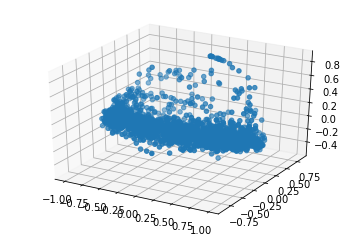

In [112]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores_normed[0],scores_normed[1],scores_normed[2])
plt.show()

In [143]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.30, min_samples=12,n_jobs=-1,leaf_size=12)
predictions = dbscan.fit_predict(scores_normed)

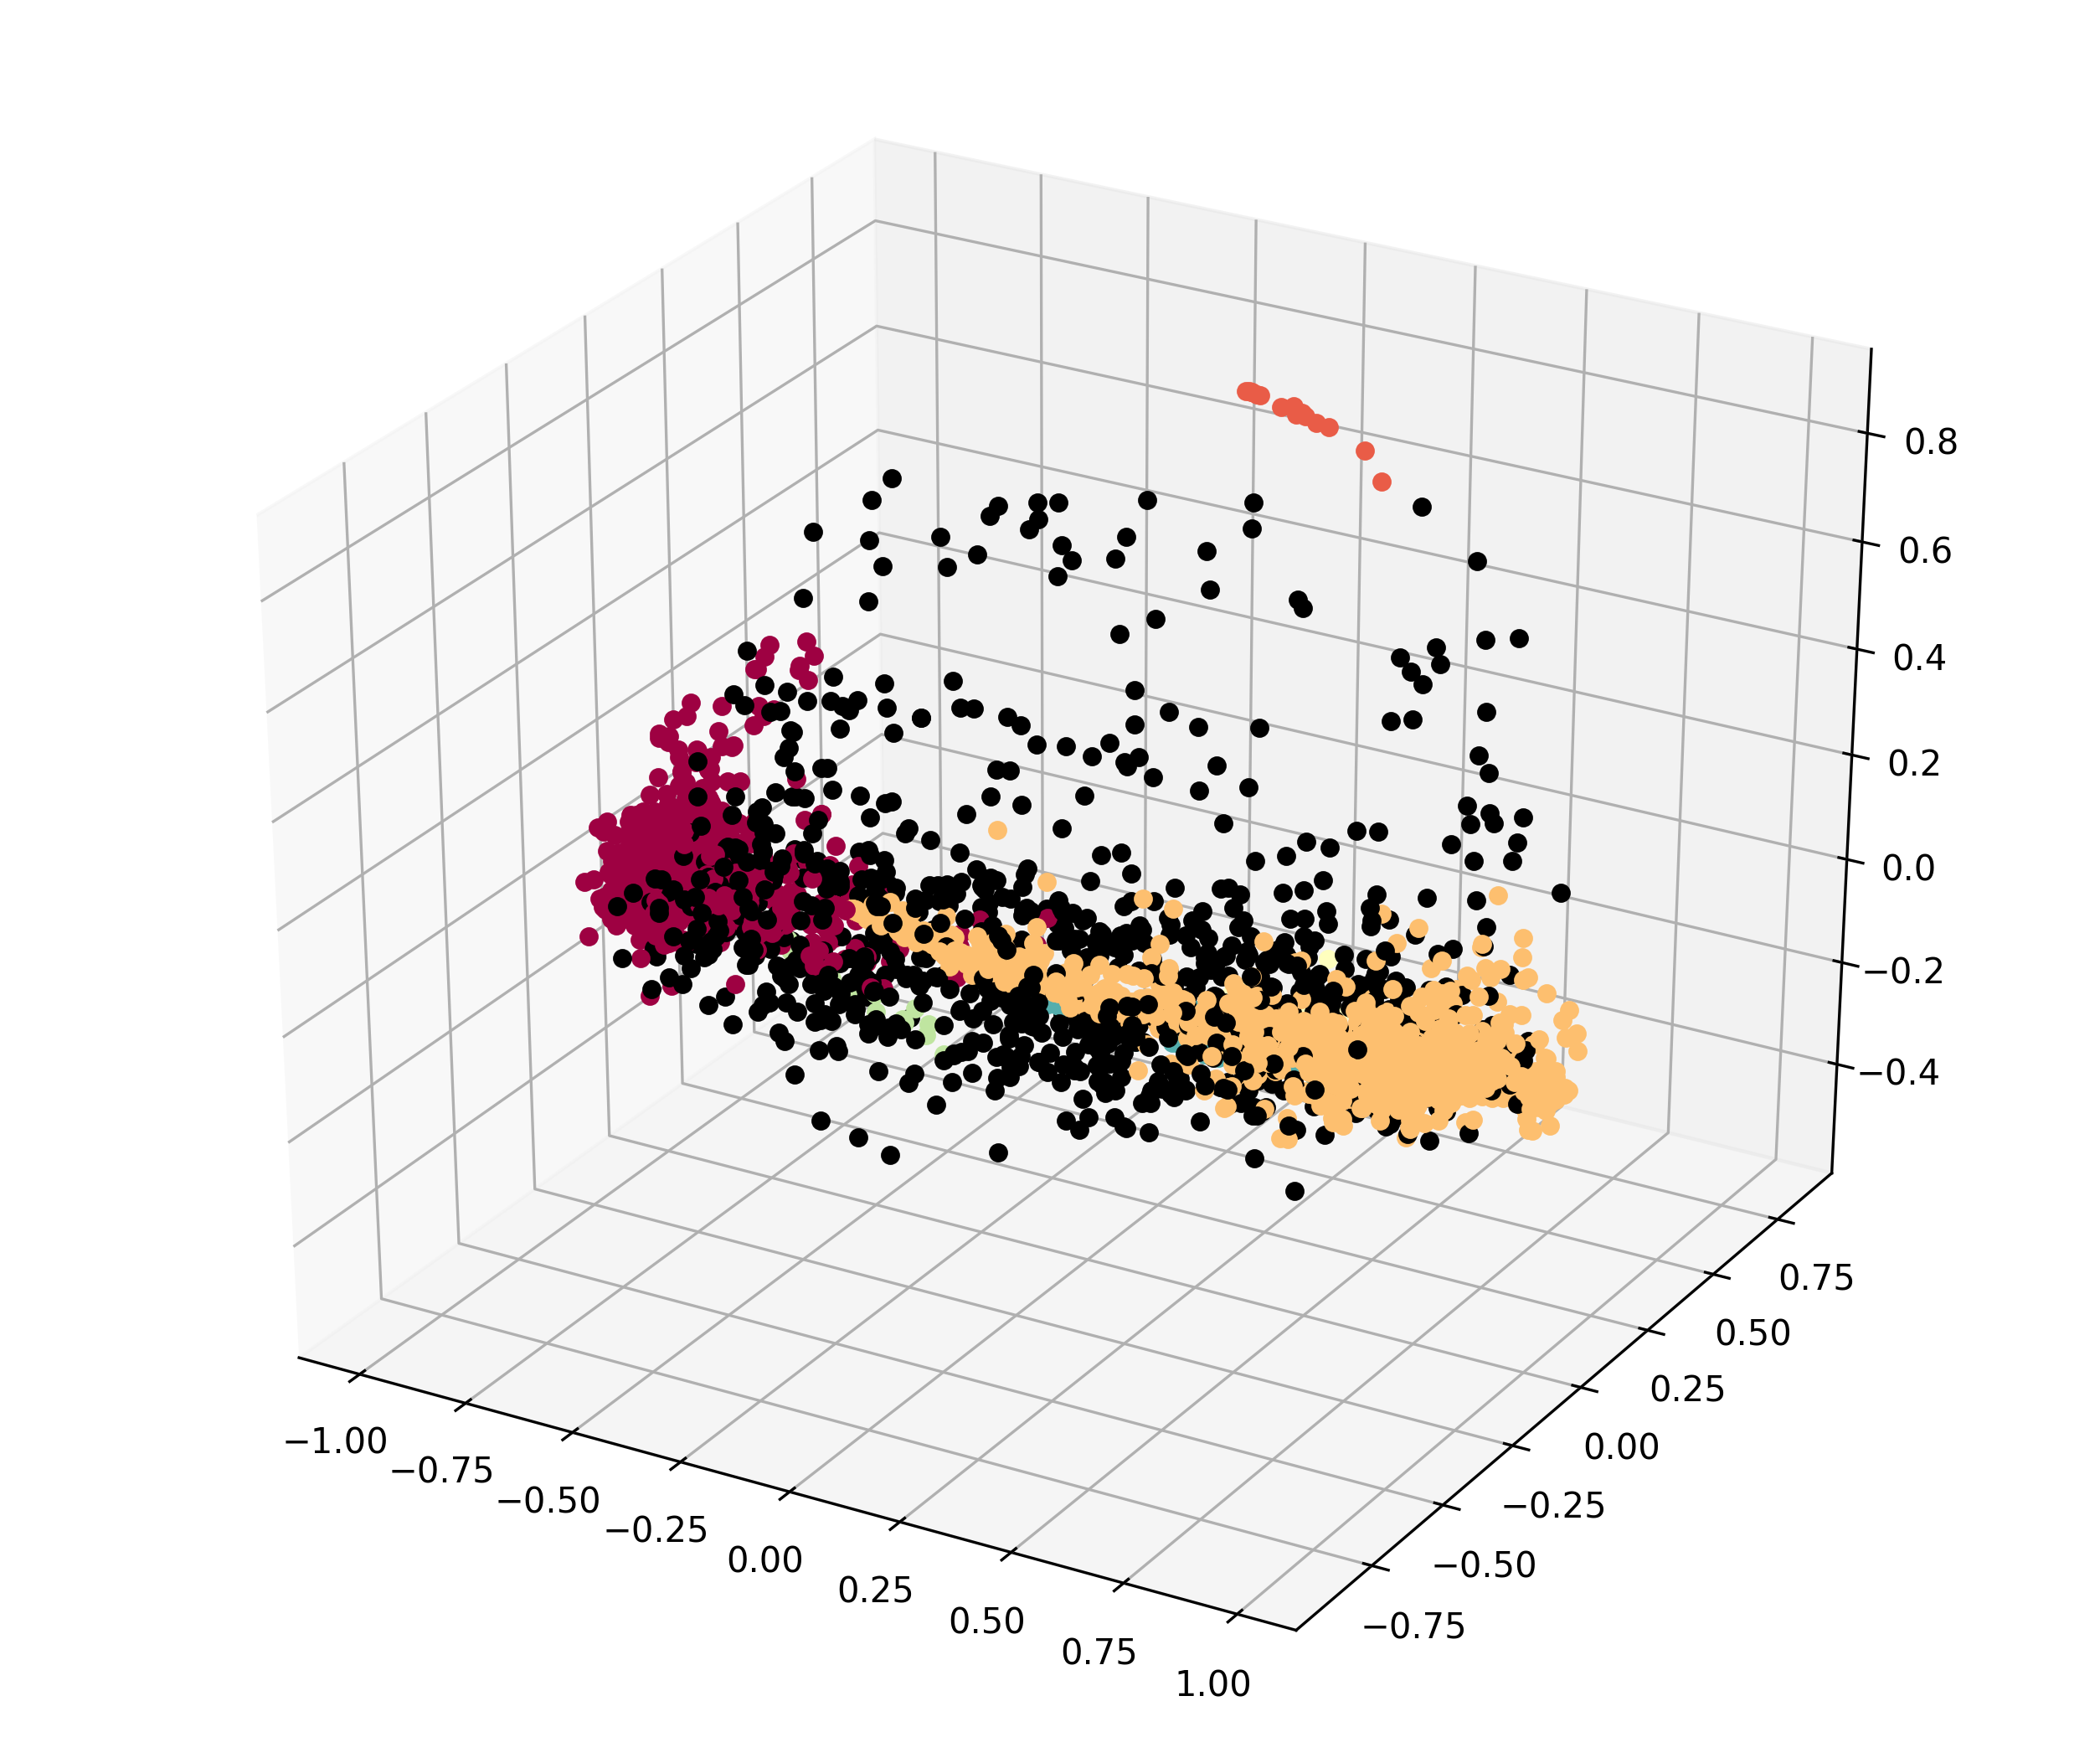

In [151]:
predictions = pd.DataFrame(predictions)

labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
fig = plt.figure(figsize=(10.5,9), dpi=300)
ax = fig.add_subplot(111, projection='3d')
for point in range(len(scores_normed)):
#     print(point)
    cluster = predictions.iloc[point][0]
    x,y,z = scores_normed.iloc[point][0],scores_normed.iloc[point][1],scores_normed.iloc[point][2]
    color = colors[cluster]
    if cluster == -1:
        color = [0,0,0,1]
    ax.scatter(x,y,z, c=color)

plt.show()

In [141]:
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [145]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5}